In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Librerías
import numpy as np
import seaborn as sns
import sys
import cv2 as cv2
import glob
from PIL import Image
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import gc
import keras
from sklearn.model_selection import train_test_split
import os


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

2023-10-01 16:59:39.878495: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-01 16:59:39.928422: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mo

2.12.0


In [2]:
## Uso de GPU
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

[480.5, 58.5, 2618619.5, 23733.0, 45849.5, 63557.0, 103012.5, 42474.5, 53921.0, 53215.0, 123612.5, 104147.0, 47308.0, 47825.0, 135021.0, 43053.0, 29197.5, 131372.5, 51324.5, 32656.0] (20,)


(-0.5, 1779.5, 1779.5, -0.5)

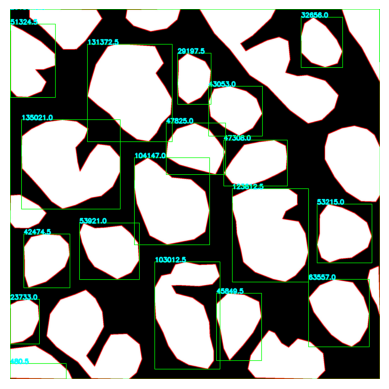

In [12]:
## https://www.geeksforgeeks.org/measure-size-of-an-object-using-python-opencv/
import cv2
  
# Load the image
img = cv2.imread('../../../Datasets/Micrografías_segmentadas/secas/MF1/1/mask_bin/IMG_20230707_161353_jpg.jpg')

# Convert to grayscale
gray = (cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

#to separate the object from the background
ret, thresh = cv2.threshold(gray, 64, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  
# Find the contours of the object 
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
# Draw the contours on the original image
cv2.drawContours(img, contours, -1, (255,0,0), 2)
  
cantidad = 0
areas = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    areas.append(area)  
    # Draw a bounding box around each
    # object and display the area on the image
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img, str(area), (x, y),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 6)
    
    cantidad += 1


print(areas, np.shape(contours))
plt.imshow(img)
plt.axis('off')

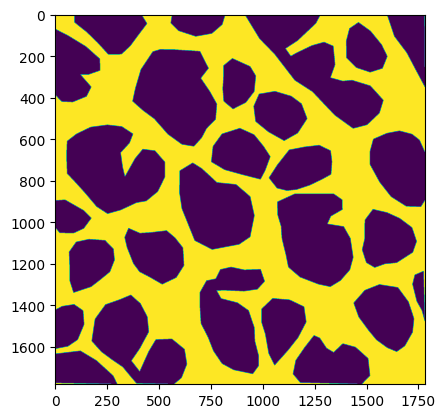

In [34]:
img = cv2.imread('../../../Datasets/Micrografías_segmentadas/secas/MF1/1/mask_bin/IMG_20230707_161353_jpg.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower = np.array([0,0,0])
upper = np.array([64,64,64])

mask = cv2.inRange(hsv, lower, upper)

plt.imshow(mask)

res = cv2.bitwise_and(hsv,hsv, mask= mask)
gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 64, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

for i in contours:
    cnt = cv2.contourArea(i)
    if cnt > 1000:  
        cv2.drawContours(img, [i], -1, (255,0,0), 2)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 64, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cnt = max(contours, key=cv2.contourArea)

area = cv2.contourArea(cnt)

In [ ]:
img = cv2.imread('../../../Datasets/Micrografías_segmentadas/secas/MF1/1/mask_bin/IMG_20230707_161353_jpg.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower = np.array([64,64,64])
upper = np.array([255,255,255])

mask = cv2.inRange(hsv, lower, upper)

res = cv2.bitwise_and(hsv,hsv, mask= mask)
gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

print(np.shape(contours))
for i in contours:
    cnt = cv2.contourArea(i)
    if cnt > 1000:  
        cv2.drawContours(img, [i], 0, (0,0,0), -1)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = max(contours, key=cv2.contourArea)
area = cv2.contourArea(cnt)
cv2.putText(img,'Gray area ='+str(area),(60,90), cv2.FONT_HERSHEY_COMPLEX, 0.5,(0,255,0),1,cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()